In [1]:
from netCDF4 import Dataset                     # For reading data
import matplotlib.pyplot as plt                 # For plotting
import numpy.ma as ma
# Place figures within document
%pylab inline
pylab.rcParams['figure.figsize'] = (18.0, 10.0) # Large figures

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load data
layerVolumeAverageFile = Dataset('../testData/layer_volume_weighted_averages.all.nc');
nTime = len(layerVolumeAverageFile.dimensions['Time']);
nOceanRegions = len(layerVolumeAverageFile.dimensions['nOceanRegionsTmp']);
nVertLevels = len(layerVolumeAverageFile.dimensions['nVertLevels']);
k=range(nVertLevels,0,-1);
timeInDays=range(0,nTime,1);
print 'nTime: ', nTime;
print 'nVertLevels: ', nVertLevels;                                         
print 'nOceanRegions: ', nOceanRegions;

nTime:  33
nVertLevels:  100
nOceanRegions:  7


number of dimensions in temperatureProfile:  2
size of temperatureProfile:  (33, 100)
xtime:  (33, 64)
number of dimensions in avgLayerTemperature:  2
size of temperatureProfile:  (33, 100)
size of zMid:  100


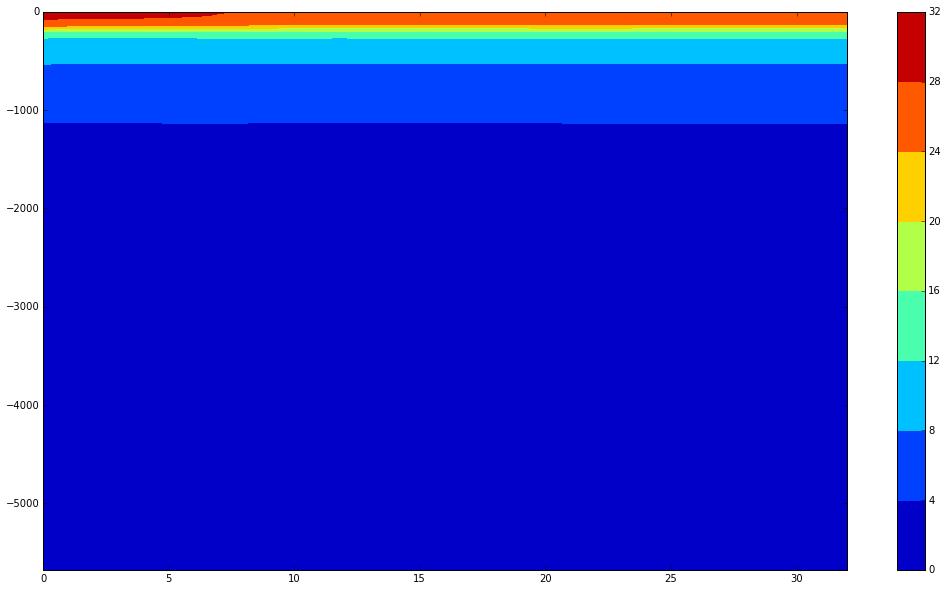

In [3]:
iRegion = 4;

referenceLayerProfile = layerVolumeAverageFile.variables['avgLayerThickness'][0,iRegion,:];
avgLayerThickness = layerVolumeAverageFile.variables['avgLayerThickness'][:,iRegion,:];
avgLayerTemperature = layerVolumeAverageFile.variables['avgLayerTemperature'][:,iRegion,:];
avgLayerArea = layerVolumeAverageFile.variables['avgLayerArea'][:,iRegion,:];
sumLayerMaskValue = layerVolumeAverageFile.variables['sumLayerMaskValue'][:,iRegion,:];
xtime = layerVolumeAverageFile.variables['xtime'][:,:];
print 'number of dimensions in temperatureProfile: ', avgLayerTemperature.ndim
print 'size of temperatureProfile: ', avgLayerTemperature.shape
print 'xtime: ', xtime.shape

zMid = np.cumsum(referenceLayerProfile) - 0.5*referenceLayerProfile[0];
zMid = -1.0 * zMid;
plt.contourf(timeInDays, zMid, avgLayerTemperature.T)
plt.colorbar();

print 'number of dimensions in avgLayerTemperature: ', avgLayerTemperature.ndim
print 'size of temperatureProfile: ', avgLayerTemperature.shape
print 'size of zMid: ', zMid.size

(33, 100)
(33, 100)
(33, 100)
(33,)


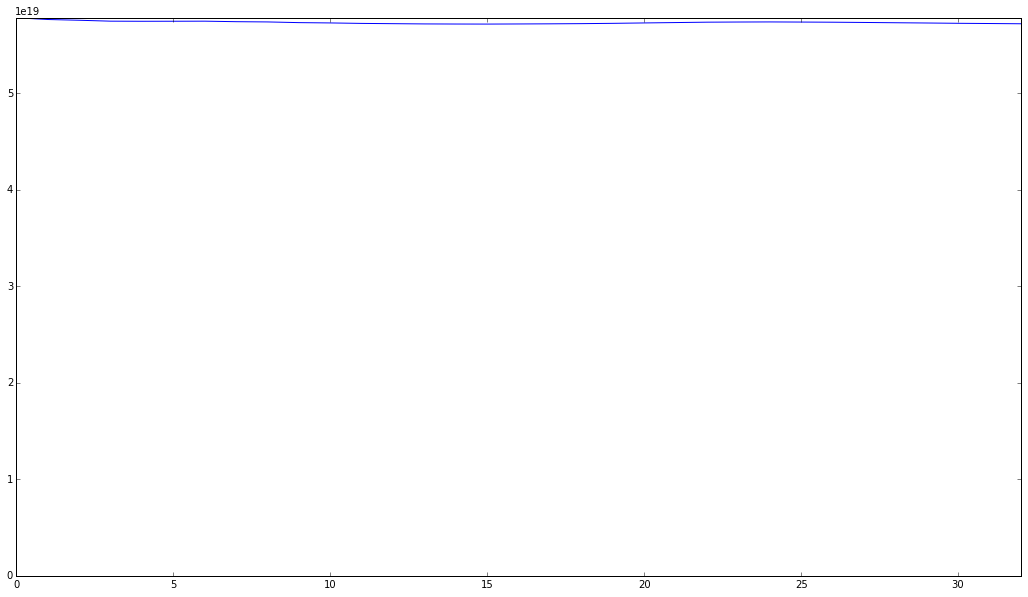

In [4]:
reference_density = 1000.0;  # kg m^{-3}
specific_heat_of_water = 3990.0;  # J kg^{-1} C^{-1}
avgLayerVolume = numpy.multiply(avgLayerThickness,avgLayerArea);   # m^{-3}
avgLayerHeatContent = reference_density * specific_heat_of_water * numpy.multiply(avgLayerTemperature, avgLayerVolume);
totalHeatContentByLayer = np.cumsum(avgLayerHeatContent, axis=1);
totalHeatContent = totalHeatContentByLayer[:,nVertLevels-1];
plt.contourf(timeInDays, zMid, totalHeatContentByLayer.T)
plt.plot(timeInDays, totalHeatContent);
print avgLayerThickness.shape
print avgLayerVolume.shape
print totalHeatContentByLayer.shape
print totalHeatContent.shape

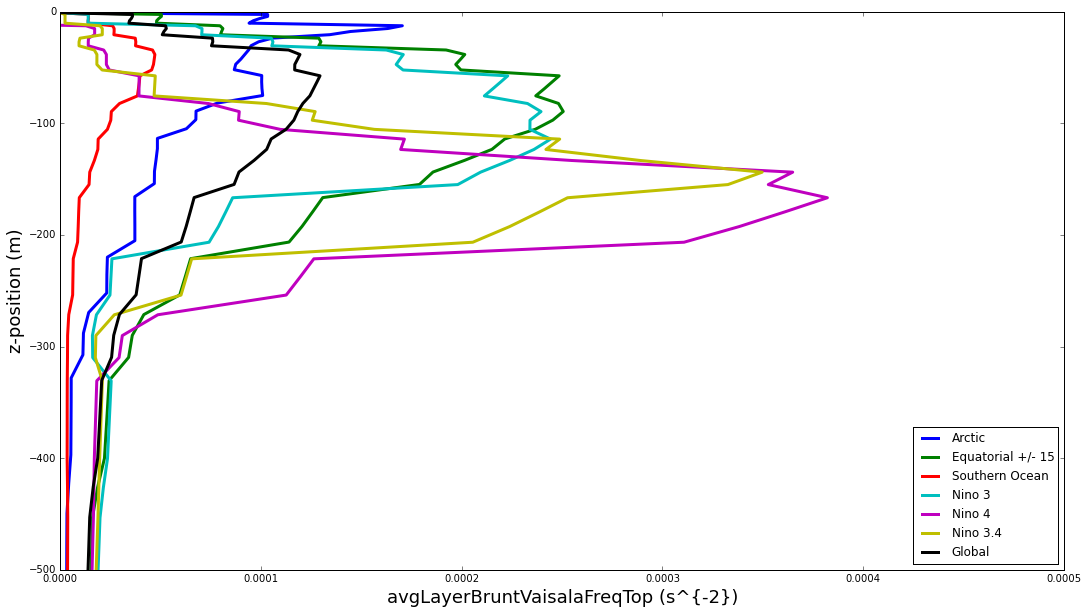

In [5]:
iTime = 0;
for iRegion in range(0,nOceanRegions):
    avgLayerBruntVaisalaFreqTop = layerVolumeAverageFile.variables['avgLayerBruntVaisalaFreqTop'][iTime,iRegion,:];
    layerProfile = layerVolumeAverageFile.variables['avgLayerThickness'][iTime,iRegion,:];
    zMid = np.cumsum(layerProfile) - 0.5*layerProfile[0]
    zMid = -1.0 * zMid
    plt.plot(avgLayerBruntVaisalaFreqTop,zMid,linewidth=3);
    plt.xlabel('avgLayerBruntVaisalaFreqTop (s^{-2})', fontsize=18); plt.ylabel('z-position (m)', fontsize=18);
    plt.legend(['Arctic', 'Equatorial +/- 15', 'Southern Ocean', 'Nino 3', 'Nino 4', 'Nino 3.4', 'Global'], loc='lower right');
    plt.axis([1.0e-8, 5.0e-4, -500, 0])